# Car price prediction - Exploratory Data Analysis
_Cong Tung Nguyen (October 2022)_ 
<br>
----

In this notebook, I will perform a exploratory data analysis on the cleaned dataset.

### 1. Importing the libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### 2. Importing the dataset

In [22]:
cars_df_cleaned = pd.read_pickle('./dataset/cars_df_cleaned.pkl')

In [23]:
cars_df_cleaned.head()

,Price (HUF),Brand,Year,Condition,Design,Kilometers,Persons,Doors,Own_weight (kg),Full_weight (kg),Trunk (liter),Fuel,Cylinder (cm3),Layout,Wheel_drive,Gearbox,Document,Roadworthiness,AirCon_Type,Colour,Power (kW),HorsePower (hp),Age
0,499999,SKODA,2003,Megkímélt,Ferdehátú,290000,5,5,1054.0,1539.0,248.0,Benzin,1198.0,Soros,Első kerék,Manuális (5 fokozatú),Érvényes magyar okmányokkal,2024,NaN,NaN,40.0,54.0,19
1,499999,FORD,2003,Normál,Ferdehátú,240000,5,5,1045.0,1515.0,284.0,Benzin,1299.0,Soros,Első kerék,Manuális (5 fokozatú),Érvényes magyar okmányokkal,2023,NaN,NaN,51.0,69.0,19
2,500000,NISSAN,2003,Normál,Ferdehátú,222150,5,3,1170.0,1710.0,355.0,Benzin,1498.0,Soros,Első kerék,Manuális (5 fokozatú),Érvényes magyar okmányokkal,2024,Manuális klíma,NaN,72.0,98.0,19
3,420000,SEAT,2003,Megkímélt,Ferdehátú,183000,5,5,1135.0,1645.0,340.0,Benzin,1390.0,Soros,Első kerék,Manuális (5 fokozatú),Érvényes külföldi okmányokkal,2024,Manuális klíma,NaN,55.0,75.0,19
4,529000,DAEWOO,2004,Megkímélt,Ferdehátú,165000,5,5,1000.0,1490.0,220.0,Benzin,1399.0,Soros,Első kerék,Manuális (5 fokozatú),Érvényes magyar okmányokkal,2024,NaN,NaN,61.0,83.0,18


In [24]:
cars_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 488
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price (HUF)       487 non-null    int64  
 1   Brand             487 non-null    object 
 2   Year              487 non-null    object 
 3   Condition         487 non-null    object 
 4   Design            487 non-null    object 
 5   Kilometers        487 non-null    int64  
 6   Persons           473 non-null    object 
 7   Doors             477 non-null    object 
 8   Own_weight (kg)   458 non-null    float64
 9   Full_weight (kg)  456 non-null    float64
 10  Trunk (liter)     421 non-null    float64
 11  Fuel              483 non-null    object 
 12  Cylinder (cm3)    477 non-null    float64
 13  Layout            436 non-null    object 
 14  Wheel_drive       470 non-null    object 
 15  Gearbox           470 non-null    object 
 16  Document          487 non-null    object 
 1

### 3. Data insights

### a) Descriptive stats

In [25]:
# Desciptive statistics
cars_df_cleaned.describe()

,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,4.870000e+02,487.000000,458.000000,456.000000,421.000000,477.000000,482.000000,482.00000,487.000000
mean,3.800876e+06,174452.542094,1402.665939,1947.160088,439.634204,1826.658281,99.134855,134.86722,12.264887
std,2.812523e+06,93801.922471,344.230528,416.918838,247.388453,677.236217,44.543287,60.55539,7.357260
min,4.200000e+05,1.000000,350.000000,620.000000,139.000000,505.000000,4.000000,5.00000,0.000000
25%,9.490000e+05,109806.500000,1176.250000,1677.500000,320.000000,1390.000000,70.000000,95.00000,6.000000
50%,2.499000e+06,175840.000000,1351.000000,1872.500000,435.000000,1598.000000,88.000000,120.00000,12.000000
75%,5.990000e+06,234567.000000,1595.000000,2156.250000,520.000000,1995.000000,114.000000,155.00000,17.000000
max,9.490000e+06,556975.000000,3150.000000,3950.000000,4000.000000,6466.000000,373.000000,507.00000,62.000000


As you can see, the dataset price ranges between 420.000 - 9.5M HUF. The standard deviation of the kilometers is pretty big, the dataset contains not only old, but new cars as well. 

In [26]:
# Descriptive stats sub groups
brands = np.unique(cars_df_cleaned['Brand']).tolist()

for b in brands:
    print(b)
    display(cars_df_cleaned.loc[cars_df_cleaned['Brand']==b].describe())

ABARTH


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,2.000000e+00,2.000000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.000000
mean,8.645000e+06,13354.000000,1055.000000,1405.000000,185.0,1368.0,126.500000,172.000000,2.000000
std,1.195010e+06,7147.435344,28.284271,28.284271,0.0,0.0,7.778175,9.899495,1.414214
min,7.800000e+06,8300.000000,1035.000000,1385.000000,185.0,1368.0,121.000000,165.000000,1.000000
25%,8.222500e+06,10827.000000,1045.000000,1395.000000,185.0,1368.0,123.750000,168.500000,1.500000
50%,8.645000e+06,13354.000000,1055.000000,1405.000000,185.0,1368.0,126.500000,172.000000,2.000000
75%,9.067500e+06,15881.000000,1065.000000,1415.000000,185.0,1368.0,129.250000,175.500000,2.500000
max,9.490000e+06,18408.000000,1075.000000,1425.000000,185.0,1368.0,132.000000,179.000000,3.000000


ALFA


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,6.000000e+00,6.000000,6.000000,6.000000,5.000000,6.00000,6.000000,6.00000,6.000000
mean,3.720000e+06,169296.166667,1349.166667,1848.333333,358.000000,1863.00000,108.166667,147.00000,11.166667
std,3.754688e+06,55376.881546,199.284136,229.557545,111.445054,313.73492,37.933714,51.48592,5.706721
min,5.900000e+05,115000.000000,1065.000000,1470.000000,270.000000,1368.00000,51.000000,69.00000,5.000000
25%,9.675000e+05,125061.000000,1225.000000,1745.000000,280.000000,1687.50000,85.250000,116.25000,6.500000
50%,2.175000e+06,154160.500000,1357.500000,1905.000000,280.000000,1963.00000,117.500000,160.00000,10.500000
75%,6.037500e+06,217861.250000,1516.250000,2035.000000,480.000000,2099.75000,130.250000,176.75000,15.250000
max,9.490000e+06,238000.000000,1565.000000,2040.000000,480.000000,2143.00000,154.000000,209.00000,19.000000


AUDI


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,3.000000e+01,30.000000,29.000000,29.000000,28.000000,30.000000,30.000000,30.000000,30.000000
mean,4.875133e+06,213784.600000,1602.862069,2185.517241,485.428571,2233.433333,132.566667,180.266667,12.333333
std,3.100322e+06,62114.939775,266.816647,290.234957,105.456478,633.074255,44.203045,60.003410,6.019127
min,5.890000e+05,63277.000000,1090.000000,1650.000000,270.000000,1395.000000,66.000000,90.000000,4.000000
25%,2.210000e+06,180140.500000,1400.000000,1950.000000,425.000000,1822.500000,104.750000,142.500000,7.000000
50%,5.680000e+06,215664.500000,1683.000000,2235.000000,520.000000,1968.000000,132.000000,179.000000,11.500000
75%,7.799999e+06,244057.750000,1770.000000,2350.000000,546.000000,2899.750000,153.000000,207.750000,16.750000
max,9.490000e+06,335000.000000,2335.000000,2995.000000,775.000000,4134.000000,258.000000,351.000000,24.000000


BMW


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,4.200000e+01,42.000000,39.000000,39.000000,38.000000,40.000000,41.000000,41.000000,42.000000
mean,4.606117e+06,211858.166667,1574.230769,2100.000000,429.868421,2420.225000,145.902439,198.487805,14.023810
std,3.159378e+06,98616.898307,238.312429,279.861338,95.920060,661.502311,55.691923,75.688877,5.965298
min,5.900000e+05,1.000000,1195.000000,1630.000000,180.000000,1596.000000,75.000000,102.000000,4.000000
25%,2.174975e+06,135950.000000,1397.500000,1875.000000,412.500000,1995.000000,110.000000,150.000000,10.000000
50%,3.949500e+06,224553.000000,1530.000000,2065.000000,460.000000,1995.000000,135.000000,184.000000,14.000000
75%,7.537500e+06,307250.000000,1710.000000,2235.000000,491.250000,2982.500000,170.000000,231.000000,18.500000
max,9.490000e+06,363000.000000,2095.000000,2780.000000,650.000000,4999.000000,373.000000,507.000000,29.000000


CHEVROLET


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,9.000000e+00,9.000000,8.000000,8.000000,7.000000,9.000000,9.000000,9.000000,9.000000
mean,3.151000e+06,177578.111111,1413.375000,1940.750000,302.571429,2405.555556,117.000000,159.222222,14.444444
std,3.151721e+06,101128.566175,760.863032,868.027608,116.037145,1841.552545,82.254179,111.705839,4.065437
min,5.900000e+05,84400.000000,775.000000,1250.000000,170.000000,796.000000,38.000000,52.000000,9.000000
25%,6.190000e+05,105941.000000,1075.000000,1550.000000,222.500000,1598.000000,80.000000,109.000000,11.000000
50%,2.140000e+06,121200.000000,1230.000000,1719.000000,275.000000,1598.000000,83.000000,113.000000,16.000000
75%,5.300000e+06,263910.000000,1385.500000,1891.000000,389.000000,3600.000000,140.000000,190.000000,17.000000
max,8.250000e+06,350000.000000,3150.000000,3950.000000,450.000000,6466.000000,265.000000,360.000000,21.000000


CHRYSLER


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,2.000000e+00,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.00000,2.00000
mean,2.424500e+06,251092.000000,1918.500000,2272.000000,630.0,3252.500000,171.500000,233.50000,15.50000
std,2.467803e+05,22921.573419,51.618795,52.325902,0.0,375.473701,16.263456,21.92031,2.12132
min,2.250000e+06,234884.000000,1882.000000,2235.000000,630.0,2987.000000,160.000000,218.00000,14.00000
25%,2.337250e+06,242988.000000,1900.250000,2253.500000,630.0,3119.750000,165.750000,225.75000,14.75000
50%,2.424500e+06,251092.000000,1918.500000,2272.000000,630.0,3252.500000,171.500000,233.50000,15.50000
75%,2.511750e+06,259196.000000,1936.750000,2290.500000,630.0,3385.250000,177.250000,241.25000,16.25000
max,2.599000e+06,267300.000000,1955.000000,2309.000000,630.0,3518.000000,183.000000,249.00000,17.00000


CITROEN


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.100000e+01,11.000000,11.000000,11.000000,10.000000,11.000000,11.000000,11.000000,11.000000
mean,2.414091e+06,151555.727273,1372.636364,1966.090909,371.100000,1560.363636,77.363636,105.181818,11.000000
std,1.914631e+06,77824.529533,292.313966,507.857353,103.724475,249.055124,12.587873,17.157029,5.366563
min,5.499990e+05,130.000000,1055.000000,1515.000000,208.000000,1199.000000,61.000000,83.000000,1.000000
25%,9.490000e+05,143549.500000,1190.500000,1701.500000,307.250000,1378.500000,67.000000,91.000000,9.000000
50%,2.100000e+06,175230.000000,1300.000000,1779.000000,352.500000,1560.000000,80.000000,109.000000,11.000000
75%,2.549000e+06,182108.000000,1514.000000,2154.000000,425.500000,1587.000000,82.000000,111.000000,14.000000
max,5.990000e+06,247293.000000,2060.000000,3300.000000,550.000000,1997.000000,100.000000,136.000000,20.000000


DACIA


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2.627000e+06,121171.600000,1085.400000,1595.800000,439.600000,1249.000000,63.000000,85.800000,9.000000
std,1.652230e+06,91421.478465,89.097138,95.061559,114.687837,329.024315,4.795832,6.572671,5.700877
min,5.900000e+05,204.000000,962.000000,1520.000000,320.000000,898.000000,55.000000,75.000000,1.000000
25%,2.249000e+06,83254.000000,1050.000000,1535.000000,320.000000,898.000000,62.000000,84.000000,8.000000
50%,2.499000e+06,126000.000000,1095.000000,1561.000000,475.000000,1390.000000,66.000000,90.000000,9.000000
75%,2.599000e+06,145900.000000,1115.000000,1608.000000,510.000000,1461.000000,66.000000,90.000000,10.000000
max,5.198000e+06,250500.000000,1205.000000,1755.000000,573.000000,1598.000000,66.000000,90.000000,17.000000


DAEWOO


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,629666.666667,119933.333333,1078.333333,1588.333333,255.000000,1382.333333,63.666667,86.666667,17.666667
std,125300.970999,64937.380093,171.488581,210.495447,60.621778,224.464548,12.220202,16.802778,0.577350
min,529000.000000,45500.000000,960.000000,1445.000000,220.000000,1150.000000,53.000000,72.000000,17.000000
25%,559500.000000,97400.000000,980.000000,1467.500000,220.000000,1274.500000,57.000000,77.500000,17.500000
50%,590000.000000,149300.000000,1000.000000,1490.000000,220.000000,1399.000000,61.000000,83.000000,18.000000
75%,680000.000000,157150.000000,1137.500000,1660.000000,272.500000,1498.500000,69.000000,94.000000,18.000000
max,770000.000000,165000.000000,1275.000000,1830.000000,325.000000,1598.000000,77.000000,105.000000,18.000000


FIAT


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.200000e+01,12.000000,10.000000,10.000000,8.000000,11.000000,11.000000,11.000000,12.000000
mean,2.906694e+06,148664.916667,1093.500000,1510.500000,266.250000,1408.363636,64.272727,87.181818,18.250000
std,2.652631e+06,91618.417513,229.807286,286.098759,118.686562,360.931371,21.494608,29.345590,16.153384
min,7.700000e+05,14900.000000,840.000000,1255.000000,165.000000,999.000000,40.000000,54.000000,1.000000
25%,8.300000e+05,87008.750000,927.500000,1308.750000,185.000000,1175.000000,51.000000,69.000000,9.000000
50%,1.499500e+06,149900.000000,1047.500000,1400.000000,216.500000,1248.000000,54.000000,73.000000,17.000000
75%,5.497500e+06,209437.000000,1227.500000,1678.750000,310.250000,1671.500000,79.000000,107.000000,20.000000
max,7.300000e+06,314100.000000,1570.000000,2100.000000,515.000000,1995.000000,103.000000,140.000000,62.000000


FORD


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,3.900000e+01,39.000000,36.000000,36.000000,32.000000,39.000000,39.000000,39.000000,39.000000
mean,3.216510e+06,197664.461538,1422.666667,1981.416667,480.781250,1792.307692,95.076923,129.384615,11.769231
std,2.631571e+06,130979.512436,272.122871,368.791414,172.194514,661.306210,43.995445,59.897990,5.949177
min,4.999990e+05,11000.000000,890.000000,1265.000000,186.000000,999.000000,44.000000,60.000000,1.000000
25%,8.500000e+05,98895.000000,1272.000000,1755.000000,379.500000,1399.000000,70.000000,95.500000,6.500000
50%,2.499000e+06,178542.000000,1395.000000,1922.500000,465.500000,1596.000000,92.000000,125.000000,13.000000
75%,5.690000e+06,239500.000000,1672.500000,2197.500000,544.250000,1997.000000,99.500000,135.500000,16.500000
max,7.800000e+06,556975.000000,2109.000000,3000.000000,917.000000,3731.000000,224.000000,305.000000,24.000000


HONDA


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1.973714e+06,191411.428571,1301.000000,1761.428571,399.000000,1568.428571,83.428571,113.571429,14.285714
std,8.110043e+05,56585.904275,209.027909,226.508173,48.114447,384.462767,19.932027,27.103857,3.988077
min,7.700000e+05,110150.000000,1090.000000,1520.000000,315.000000,1198.000000,66.000000,90.000000,11.000000
25%,1.475000e+06,154702.000000,1126.500000,1577.500000,375.000000,1268.500000,66.000000,90.000000,11.500000
50%,2.499000e+06,199431.000000,1246.000000,1690.000000,406.000000,1396.000000,73.000000,99.000000,13.000000
75%,2.499000e+06,231828.000000,1444.500000,1932.500000,433.000000,1824.500000,101.500000,138.000000,16.500000
max,2.599000e+06,257239.000000,1629.000000,2100.000000,456.000000,2199.000000,110.000000,150.000000,20.000000


HYUNDAI


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.000000e+01,10.000000,9.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000
mean,4.716800e+06,144553.500000,1489.333333,2068.888889,508.333333,1674.400000,103.400000,140.600000,7.900000
std,2.468427e+06,102967.002694,448.447321,538.358488,197.941911,530.152012,44.402703,60.503811,3.573047
min,9.490000e+05,11526.000000,933.000000,1420.000000,252.000000,998.000000,48.000000,65.000000,4.000000
25%,2.442250e+06,59584.250000,1204.000000,1775.000000,370.000000,1274.250000,79.750000,108.750000,5.250000
50%,5.645000e+06,135000.000000,1370.000000,1870.000000,443.000000,1632.500000,100.000000,136.000000,7.000000
75%,6.560000e+06,203057.500000,1836.000000,2510.000000,585.000000,2140.500000,111.250000,151.250000,8.750000
max,7.800000e+06,306000.000000,2280.000000,3070.000000,842.000000,2497.000000,202.000000,275.000000,15.000000


INFINITI


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,3.000000e+00,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
mean,7.466667e+06,118241.000000,2013.000000,2504.000000,375.000000,2944.000000,176.666667,240.333333,9.333333
std,9.928914e+05,62963.443703,193.747258,217.788889,49.497475,777.658665,57.518113,78.526004,3.055050
min,6.350000e+06,45723.000000,1876.000000,2350.000000,340.000000,2143.000000,120.000000,163.000000,6.000000
25%,7.075000e+06,97861.500000,1944.500000,2427.000000,357.500000,2568.000000,147.500000,200.500000,8.000000
50%,7.800000e+06,150000.000000,2013.000000,2504.000000,375.000000,2993.000000,175.000000,238.000000,10.000000
75%,8.025000e+06,154500.000000,2081.500000,2581.000000,392.500000,3344.500000,205.000000,279.000000,11.000000
max,8.250000e+06,159000.000000,2150.000000,2658.000000,410.000000,3696.000000,235.000000,320.000000,12.000000


JAGUAR


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,6350000.0,258000.0,1755.0,2300.0,520.0,2993.0,202.0,275.0,11.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6350000.0,258000.0,1755.0,2300.0,520.0,2993.0,202.0,275.0,11.0
25%,6350000.0,258000.0,1755.0,2300.0,520.0,2993.0,202.0,275.0,11.0
50%,6350000.0,258000.0,1755.0,2300.0,520.0,2993.0,202.0,275.0,11.0
75%,6350000.0,258000.0,1755.0,2300.0,520.0,2993.0,202.0,275.0,11.0
max,6350000.0,258000.0,1755.0,2300.0,520.0,2993.0,202.0,275.0,11.0


JEEP


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1950000.0,220000.0,2135.0,2750.0,978.0,2987.0,160.0,218.0,16.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1950000.0,220000.0,2135.0,2750.0,978.0,2987.0,160.0,218.0,16.0
25%,1950000.0,220000.0,2135.0,2750.0,978.0,2987.0,160.0,218.0,16.0
50%,1950000.0,220000.0,2135.0,2750.0,978.0,2987.0,160.0,218.0,16.0
75%,1950000.0,220000.0,2135.0,2750.0,978.0,2987.0,160.0,218.0,16.0
max,1950000.0,220000.0,2135.0,2750.0,978.0,2987.0,160.0,218.0,16.0


KIA


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,2.400000e+01,24.000000,23.000000,23.000000,22.000000,24.000000,24.000000,24.000000,24.000000
mean,3.958417e+06,132422.416667,1356.695652,1868.260870,427.727273,1528.750000,83.666667,113.875000,8.958333
std,2.647888e+06,79682.426491,264.230862,282.471272,119.829316,425.876921,21.786846,29.490326,5.559787
min,5.900000e+05,5800.000000,854.000000,1350.000000,157.000000,998.000000,44.000000,60.000000,1.000000
25%,2.100000e+06,78780.000000,1223.000000,1710.000000,340.000000,1382.750000,66.000000,90.000000,4.750000
50%,2.599000e+06,135966.000000,1263.000000,1820.000000,408.500000,1398.000000,78.500000,107.000000,10.000000
75%,6.350000e+06,186490.000000,1523.500000,2005.000000,532.500000,1614.500000,101.000000,137.250000,12.000000
max,9.490000e+06,278438.000000,2088.000000,2665.000000,625.000000,2902.000000,136.000000,185.000000,20.000000


LADA


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,2.000000e+00,2.000000,1.0,1.0,0.0,1.0,1.0,1.0,2.000000
mean,3.185000e+06,35500.000000,1030.0,1430.0,NaN,1452.0,53.0,72.0,40.500000
std,3.542605e+06,34648.232278,NaN,NaN,NaN,NaN,NaN,NaN,7.778175
min,6.800000e+05,11000.000000,1030.0,1430.0,NaN,1452.0,53.0,72.0,35.000000
25%,1.932500e+06,23250.000000,1030.0,1430.0,NaN,1452.0,53.0,72.0,37.750000
50%,3.185000e+06,35500.000000,1030.0,1430.0,NaN,1452.0,53.0,72.0,40.500000
75%,4.437500e+06,47750.000000,1030.0,1430.0,NaN,1452.0,53.0,72.0,43.250000
max,5.690000e+06,60000.000000,1030.0,1430.0,NaN,1452.0,53.0,72.0,46.000000


LANCIA


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,949000.0,269000.0,1825.0,2505.0,325.0,2179.0,94.0,128.0,18.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,949000.0,269000.0,1825.0,2505.0,325.0,2179.0,94.0,128.0,18.0
25%,949000.0,269000.0,1825.0,2505.0,325.0,2179.0,94.0,128.0,18.0
50%,949000.0,269000.0,1825.0,2505.0,325.0,2179.0,94.0,128.0,18.0
75%,949000.0,269000.0,1825.0,2505.0,325.0,2179.0,94.0,128.0,18.0
max,949000.0,269000.0,1825.0,2505.0,325.0,2179.0,94.0,128.0,18.0


LAND


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,2.000000e+00,2.000000,2.000000,2.0,2.0,2.0,2.000000,2.000000,2.000000
mean,6.740000e+06,174400.000000,1677.500000,2350.0,575.0,2179.0,125.000000,170.000000,8.500000
std,1.499066e+06,7636.753237,10.606602,0.0,0.0,0.0,21.213203,28.284271,0.707107
min,5.680000e+06,169000.000000,1670.000000,2350.0,575.0,2179.0,110.000000,150.000000,8.000000
25%,6.210000e+06,171700.000000,1673.750000,2350.0,575.0,2179.0,117.500000,160.000000,8.250000
50%,6.740000e+06,174400.000000,1677.500000,2350.0,575.0,2179.0,125.000000,170.000000,8.500000
75%,7.270000e+06,177100.000000,1681.250000,2350.0,575.0,2179.0,132.500000,180.000000,8.750000
max,7.800000e+06,179800.000000,1685.000000,2350.0,575.0,2179.0,140.000000,190.000000,9.000000


LEXUS


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000
mean,5.496333e+06,165913.333333,1828.333333,2390.000000,476.333333,2727.00000,123.666667,168.333333,11.666667
std,3.030805e+06,47165.446275,267.644042,312.529999,90.123989,644.88216,55.139218,74.895483,5.131601
min,2.249000e+06,124000.000000,1585.000000,2075.000000,378.000000,2231.00000,74.000000,101.000000,6.000000
25%,4.119500e+06,140376.500000,1685.000000,2235.000000,437.000000,2362.50000,94.000000,128.000000,9.500000
50%,5.990000e+06,156753.000000,1785.000000,2395.000000,496.000000,2494.00000,114.000000,155.000000,13.000000
75%,7.120000e+06,186870.000000,1950.000000,2547.500000,525.500000,2975.00000,148.500000,202.000000,14.500000
max,8.250000e+06,216987.000000,2115.000000,2700.000000,555.000000,3456.00000,183.000000,249.000000,16.000000


LINCOLN


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
mean,5300000.0,209466.0,2400.0,3500.0,NaN,4670.0,176.0,239.0,11.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5300000.0,209466.0,2400.0,3500.0,NaN,4670.0,176.0,239.0,11.0
25%,5300000.0,209466.0,2400.0,3500.0,NaN,4670.0,176.0,239.0,11.0
50%,5300000.0,209466.0,2400.0,3500.0,NaN,4670.0,176.0,239.0,11.0
75%,5300000.0,209466.0,2400.0,3500.0,NaN,4670.0,176.0,239.0,11.0
max,5300000.0,209466.0,2400.0,3500.0,NaN,4670.0,176.0,239.0,11.0


MAZDA


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.200000e+01,12.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000
mean,3.260333e+06,163092.166667,1293.636364,1889.909091,336.818182,1785.000000,84.750000,115.500000,9.916667
std,2.004835e+06,93859.526824,206.078273,253.598286,129.136996,295.495885,16.248776,22.125674,3.895413
min,8.500000e+05,16400.000000,960.000000,1485.000000,158.000000,1349.000000,55.000000,75.000000,2.000000
25%,2.249000e+06,88500.000000,1180.000000,1770.000000,250.000000,1588.500000,77.000000,105.000000,9.250000
50%,2.499000e+06,161624.000000,1335.000000,1929.000000,340.000000,1799.000000,86.500000,118.000000,10.500000
75%,3.274250e+06,218840.000000,1416.000000,2090.000000,422.000000,1998.000000,89.750000,122.250000,12.000000
max,7.799999e+06,339390.000000,1658.000000,2245.000000,519.000000,2191.000000,110.000000,150.000000,16.000000


MERCEDES-BENZ


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,2.500000e+01,25.000000,22.000000,22.000000,19.000000,25.000000,25.000000,25.000000,25.000000
mean,5.658772e+06,227650.200000,1787.272727,2413.181818,514.421053,2380.360000,128.800000,175.120000,13.000000
std,2.435218e+06,88027.893083,399.272336,516.083109,75.708003,733.285124,52.067264,70.745035,8.154753
min,5.900000e+05,52341.000000,1085.000000,1545.000000,390.000000,1461.000000,55.000000,75.000000,5.000000
25%,5.000000e+06,165000.000000,1475.000000,2006.250000,458.000000,1991.000000,100.000000,136.000000,8.000000
50%,5.990000e+06,206000.000000,1777.500000,2355.000000,500.000000,2143.000000,120.000000,163.000000,11.000000
75%,7.799999e+06,277480.000000,2041.250000,2905.000000,550.000000,2987.000000,150.000000,204.000000,15.000000
max,9.490000e+06,411000.000000,2550.000000,3250.000000,690.000000,3996.000000,225.000000,306.000000,40.000000


MG


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,8849000.0,1.0,1264.0,1730.0,448.0,999.0,82.0,111.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8849000.0,1.0,1264.0,1730.0,448.0,999.0,82.0,111.0,0.0
25%,8849000.0,1.0,1264.0,1730.0,448.0,999.0,82.0,111.0,0.0
50%,8849000.0,1.0,1264.0,1730.0,448.0,999.0,82.0,111.0,0.0
75%,8849000.0,1.0,1264.0,1730.0,448.0,999.0,82.0,111.0,0.0
max,8849000.0,1.0,1264.0,1730.0,448.0,999.0,82.0,111.0,0.0


MICROCAR


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
mean,680000.0,49360.0,350.0,620.0,NaN,505.0,4.0,5.0,23.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,680000.0,49360.0,350.0,620.0,NaN,505.0,4.0,5.0,23.0
25%,680000.0,49360.0,350.0,620.0,NaN,505.0,4.0,5.0,23.0
50%,680000.0,49360.0,350.0,620.0,NaN,505.0,4.0,5.0,23.0
75%,680000.0,49360.0,350.0,620.0,NaN,505.0,4.0,5.0,23.0
max,680000.0,49360.0,350.0,620.0,NaN,505.0,4.0,5.0,23.0


MINI


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,7.000000e+00,7.000000,6.000000,6.000000,5.000000,7.000000,7.000000,7.000000,7.00000
mean,3.242714e+06,165631.857143,1190.833333,1640.000000,236.000000,1649.285714,93.142857,126.857143,11.00000
std,1.795533e+06,48268.742862,115.689959,144.741148,104.067286,153.102051,23.681417,31.981393,3.41565
min,2.100000e+06,86000.000000,1065.000000,1515.000000,160.000000,1560.000000,66.000000,90.000000,6.00000
25%,2.100000e+06,139500.000000,1095.000000,1545.000000,160.000000,1598.000000,82.500000,112.500000,8.50000
50%,2.250000e+06,172923.000000,1180.000000,1567.500000,160.000000,1598.000000,88.000000,120.000000,12.00000
75%,3.899500e+06,198500.000000,1295.000000,1758.750000,350.000000,1598.000000,96.500000,131.500000,14.00000
max,6.350000e+06,224500.000000,1320.000000,1830.000000,350.000000,1995.000000,140.000000,190.000000,14.00000


MITSUBISHI


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,5.000000e+00,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,3.715600e+06,222230.00000,1638.000000,2209.000000,325.600000,2265.20000,100.600000,136.800000,15.200000
std,3.761096e+06,76289.33084,621.264839,719.899299,114.419404,1032.83382,41.967845,57.071884,7.463243
min,5.900000e+05,103500.00000,970.000000,1460.000000,215.000000,1299.00000,55.000000,75.000000,6.000000
25%,5.990000e+05,215850.00000,1000.000000,1485.000000,215.000000,1332.00000,70.000000,95.000000,9.000000
50%,2.599000e+06,235800.00000,1810.000000,2310.000000,315.000000,1998.00000,89.000000,121.000000,18.000000
75%,5.300000e+06,241000.00000,2110.000000,2760.000000,420.000000,3200.00000,140.000000,190.000000,19.000000
max,9.490000e+06,315000.00000,2300.000000,3030.000000,463.000000,3497.00000,149.000000,203.000000,24.000000


NISSAN


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.700000e+01,17.000000,17.000000,17.000000,16.000000,16.000000,17.000000,17.000000,17.000000
mean,4.299059e+06,140152.176471,1298.647059,1806.823529,380.000000,1656.437500,96.117647,130.705882,9.294118
std,2.195475e+06,55014.026822,166.105742,167.819559,78.183545,530.117719,33.320193,45.308339,5.108384
min,5.000000e+05,12580.000000,910.000000,1425.000000,207.000000,1197.000000,59.000000,80.000000,4.000000
25%,2.499000e+06,94500.000000,1205.000000,1710.000000,354.000000,1498.000000,84.000000,114.000000,5.000000
50%,5.199000e+06,153000.000000,1297.000000,1830.000000,385.500000,1598.000000,85.000000,116.000000,6.000000
75%,5.990000e+06,176000.000000,1365.000000,1880.000000,410.000000,1603.000000,86.000000,117.000000,13.000000
max,7.800000e+06,222150.000000,1625.000000,2190.000000,565.000000,3498.000000,197.000000,268.000000,19.000000


OPEL


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,3.700000e+01,37.000000,34.000000,34.000000,31.000000,37.000000,37.000000,37.000000,37.000000
mean,2.922135e+06,163315.405405,1345.529412,1906.176471,360.096774,1530.135135,83.108108,113.135135,11.810811
std,2.485706e+06,83005.289271,308.359219,410.904506,129.786069,343.733275,34.540462,46.991230,6.859049
min,5.890000e+05,45805.000000,905.000000,1405.000000,140.000000,998.000000,44.000000,60.000000,2.000000
25%,8.500000e+05,112009.000000,1055.000000,1551.250000,260.000000,1229.000000,59.000000,80.000000,6.000000
50%,2.250000e+06,147000.000000,1295.000000,1892.500000,370.000000,1598.000000,81.000000,110.000000,12.000000
75%,5.190000e+06,212000.000000,1515.750000,2076.250000,500.000000,1598.000000,92.000000,125.000000,17.000000
max,9.490000e+06,460000.000000,2029.000000,3040.000000,540.000000,2792.000000,239.000000,325.000000,26.000000


PEUGEOT


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.000000e+01,10.000000,9.000000,9.000000,7.000000,10.00000,10.0000,10.000000,10.000000
mean,2.967800e+06,185304.600000,1329.222222,1984.222222,995.571429,1636.90000,80.4000,109.400000,12.600000
std,3.065680e+06,100859.284912,216.633780,309.653749,1337.584746,295.26427,15.7917,21.634335,7.105553
min,5.900000e+05,35073.000000,970.000000,1470.000000,245.000000,1199.00000,51.0000,69.000000,1.000000
25%,7.900000e+05,136125.000000,1193.000000,1850.000000,407.000000,1514.25000,80.0000,109.000000,7.250000
50%,1.524500e+06,175258.000000,1410.000000,1980.000000,520.000000,1560.00000,82.0000,111.000000,13.500000
75%,4.624750e+06,262753.750000,1417.000000,2100.000000,695.000000,1797.75000,92.5000,126.000000,18.500000
max,9.490000e+06,342812.000000,1708.000000,2505.000000,4000.000000,2179.00000,96.0000,131.000000,21.000000


PORSCHE


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,5680000.0,240000.0,2240.0,3015.0,670.0,2967.0,176.0,239.0,13.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5680000.0,240000.0,2240.0,3015.0,670.0,2967.0,176.0,239.0,13.0
25%,5680000.0,240000.0,2240.0,3015.0,670.0,2967.0,176.0,239.0,13.0
50%,5680000.0,240000.0,2240.0,3015.0,670.0,2967.0,176.0,239.0,13.0
75%,5680000.0,240000.0,2240.0,3015.0,670.0,2967.0,176.0,239.0,13.0
max,5680000.0,240000.0,2240.0,3015.0,670.0,2967.0,176.0,239.0,13.0


RENAULT


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,2.200000e+01,22.000000,22.000000,22.000000,20.000000,22.000000,22.000000,22.000000,22.000000
mean,2.770364e+06,161528.090909,1272.909091,1841.363636,407.800000,1479.909091,77.863636,105.954545,13.000000
std,2.725451e+06,79153.836258,267.237706,341.437374,136.332643,220.909356,16.452805,22.423366,6.989788
min,5.500000e+05,23176.000000,930.000000,1470.000000,198.000000,1149.000000,48.000000,65.000000,0.000000
25%,6.200000e+05,104000.000000,1121.250000,1615.000000,255.000000,1390.000000,70.500000,95.750000,6.000000
50%,9.490000e+05,179700.000000,1222.500000,1790.000000,441.000000,1461.000000,78.500000,106.500000,15.500000
75%,5.591750e+06,213250.000000,1459.250000,1952.000000,520.500000,1598.000000,93.250000,127.250000,18.000000
max,7.800000e+06,315800.000000,2029.000000,3040.000000,588.000000,1998.000000,103.000000,140.000000,25.000000


SEAT


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.000000e+01,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,10.00000,10.000000
mean,1.598600e+06,165030.900000,1140.100000,1632.700000,398.333333,1386.700000,62.500000,85.20000,15.000000
std,1.689947e+06,68853.898026,109.636217,110.979528,103.431137,241.745987,12.140383,16.61191,5.792716
min,4.200000e+05,28449.000000,1038.000000,1498.000000,267.000000,999.000000,47.000000,64.00000,2.000000
25%,7.025000e+05,120750.000000,1058.250000,1544.500000,340.000000,1246.000000,55.000000,75.00000,13.250000
50%,8.995000e+05,193500.000000,1142.500000,1630.000000,380.000000,1390.000000,57.000000,77.50000,17.000000
75%,1.811499e+06,214296.000000,1161.750000,1686.000000,485.000000,1414.000000,71.250000,97.25000,19.000000
max,5.990000e+06,244000.000000,1405.000000,1868.000000,550.000000,1896.000000,85.000000,116.00000,21.000000


SKODA


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,2.500000e+01,25.000000,24.000000,24.000000,23.000000,25.000000,25.000000,25.00000,25.000000
mean,3.997160e+06,199799.600000,1268.916667,1836.916667,518.086957,1658.360000,91.400000,124.40000,10.600000
std,2.830160e+06,82296.166589,155.698962,204.854968,145.188252,489.561273,36.282457,49.48653,6.714412
min,4.999990e+05,54600.000000,1041.000000,1539.000000,248.000000,1197.000000,40.000000,54.00000,3.000000
25%,8.500000e+05,137583.000000,1115.750000,1621.250000,493.000000,1395.000000,63.000000,86.00000,5.000000
50%,5.099999e+06,190000.000000,1297.000000,1904.500000,590.000000,1598.000000,90.000000,122.00000,10.000000
75%,5.990000e+06,270000.000000,1338.750000,1948.000000,610.000000,1968.000000,110.000000,150.00000,16.000000
max,9.490000e+06,374000.000000,1669.000000,2307.000000,660.000000,3580.000000,191.000000,260.00000,23.000000


SMART


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
mean,850000.0,179685.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,850000.0,179685.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
25%,850000.0,179685.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
50%,850000.0,179685.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
75%,850000.0,179685.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
max,850000.0,179685.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0


SSANGYONG


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.0
mean,6.413333e+06,36806.666667,1536.666667,2143.333333,694.000000,1750.333333,115.0,156.333333,4.0
std,1.602508e+06,16418.042920,396.999160,490.849604,254.996078,355.715242,19.0,25.658007,1.0
min,5.300000e+06,18420.000000,1300.000000,1850.000000,427.000000,1497.000000,94.0,128.000000,3.0
25%,5.495000e+06,30210.000000,1307.500000,1860.000000,573.500000,1547.000000,107.0,145.500000,3.5
50%,5.690000e+06,42000.000000,1315.000000,1870.000000,720.000000,1597.000000,120.0,163.000000,4.0
75%,6.970000e+06,46000.000000,1655.000000,2290.000000,827.500000,1877.000000,125.5,170.500000,4.5
max,8.250000e+06,50000.000000,1995.000000,2710.000000,935.000000,2157.000000,131.0,178.000000,5.0


SUZUKI


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.800000e+01,18.000000,18.000000,18.000000,17.000000,18.000000,18.000000,18.000000,18.000000
mean,3.040500e+06,143764.055556,1107.777778,1623.055556,315.411765,1429.333333,78.888889,107.222222,12.222222
std,2.469509e+06,101515.661640,205.599713,239.626786,97.184785,379.618694,20.361119,27.626832,7.565833
min,5.950000e+05,8554.000000,800.000000,1165.000000,177.000000,996.000000,46.000000,63.000000,2.000000
25%,8.500000e+05,64371.500000,963.750000,1472.500000,226.000000,1256.000000,65.250000,88.750000,3.500000
50%,2.269500e+06,123950.000000,1115.000000,1662.500000,300.000000,1350.500000,73.500000,100.000000,13.500000
75%,6.185000e+06,230497.500000,1191.250000,1730.000000,430.000000,1373.000000,101.000000,137.250000,18.000000
max,6.749000e+06,320000.000000,1505.000000,2070.000000,430.000000,2493.000000,106.000000,144.000000,23.000000


TOYOTA


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,2.400000e+01,24.000000,24.000000,24.000000,23.000000,24.000000,24.000000,24.000000,24.000000
mean,3.843083e+06,133667.000000,1294.791667,1757.708333,423.869565,1632.708333,78.791667,107.208333,12.083333
std,3.165382e+06,87110.182004,345.833835,393.600932,224.409792,623.244559,23.829064,32.378172,7.276625
min,5.900000e+05,2500.000000,780.000000,1180.000000,139.000000,998.000000,50.000000,68.000000,0.000000
25%,9.365000e+05,78200.750000,1223.750000,1707.500000,350.000000,1356.000000,66.000000,90.000000,5.750000
50%,2.320000e+06,113138.000000,1312.500000,1775.000000,390.000000,1538.500000,72.500000,98.500000,13.500000
75%,7.425000e+06,194750.000000,1377.500000,1825.000000,471.000000,1798.000000,91.250000,124.250000,18.250000
max,9.490000e+06,340000.000000,2550.000000,3260.000000,1310.000000,4164.000000,150.000000,204.000000,24.000000


TRABANT


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
mean,2100000.0,40000.0,880.0,1300.0,NaN,594.0,19.0,26.0,32.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2100000.0,40000.0,880.0,1300.0,NaN,594.0,19.0,26.0,32.0
25%,2100000.0,40000.0,880.0,1300.0,NaN,594.0,19.0,26.0,32.0
50%,2100000.0,40000.0,880.0,1300.0,NaN,594.0,19.0,26.0,32.0
75%,2100000.0,40000.0,880.0,1300.0,NaN,594.0,19.0,26.0,32.0
max,2100000.0,40000.0,880.0,1300.0,NaN,594.0,19.0,26.0,32.0


UAZ


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
mean,2100000.0,8000.0,NaN,NaN,NaN,2400.0,55.0,75.0,32.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2100000.0,8000.0,NaN,NaN,NaN,2400.0,55.0,75.0,32.0
25%,2100000.0,8000.0,NaN,NaN,NaN,2400.0,55.0,75.0,32.0
50%,2100000.0,8000.0,NaN,NaN,NaN,2400.0,55.0,75.0,32.0
75%,2100000.0,8000.0,NaN,NaN,NaN,2400.0,55.0,75.0,32.0
max,2100000.0,8000.0,NaN,NaN,NaN,2400.0,55.0,75.0,32.0


VOLKSWAGEN


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,4.100000e+01,41.000000,38.000000,37.000000,34.000000,37.000000,40.000000,40.00000,41.000000
mean,3.853268e+06,189022.365854,1396.263158,1967.810811,512.941176,1718.027027,88.600000,120.57500,13.024390
std,2.782714e+06,103284.437150,285.655688,338.397518,347.321172,337.276633,30.419966,41.27698,9.242532
min,6.000000e+05,10.000000,995.000000,1500.000000,250.000000,1197.000000,47.000000,64.00000,1.000000
25%,2.080000e+06,152200.000000,1186.250000,1650.000000,292.500000,1395.000000,65.250000,89.00000,7.000000
50%,2.599000e+06,191342.000000,1402.000000,1990.000000,490.500000,1598.000000,79.000000,107.50000,12.000000
75%,5.690000e+06,248048.000000,1528.000000,2170.000000,598.750000,1968.000000,103.000000,140.00000,17.000000
max,9.490000e+06,425641.000000,2347.000000,2945.000000,2300.000000,2967.000000,176.000000,239.00000,57.000000


VOLVO


,Price (HUF),Kilometers,Own_weight (kg),Full_weight (kg),Trunk (liter),Cylinder (cm3),Power (kW),HorsePower (hp),Age
count,9.000000e+00,9.000000,9.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000
mean,5.917778e+06,179632.333333,1734.111111,2273.750000,449.375000,2228.333333,136.444444,185.444444,9.222222
std,2.390177e+06,58793.662341,269.915470,286.440595,96.418637,394.589343,35.525030,48.280718,4.409586
min,2.390000e+06,99500.000000,1298.000000,1780.000000,233.000000,1560.000000,80.000000,109.000000,5.000000
25%,4.900000e+06,144125.000000,1642.000000,2092.500000,428.500000,1969.000000,112.000000,152.000000,7.000000
50%,6.350000e+06,170000.000000,1706.000000,2350.000000,486.500000,2400.000000,140.000000,190.000000,7.000000
75%,6.750000e+06,220000.000000,1893.000000,2505.000000,490.000000,2400.000000,158.000000,215.000000,12.000000
max,9.490000e+06,277860.000000,2198.000000,2590.000000,555.000000,2922.000000,200.000000,272.000000,18.000000


### b) Data viz.

With the next plot, I want to see how the variables are distributed, and how they are correlated with each other.

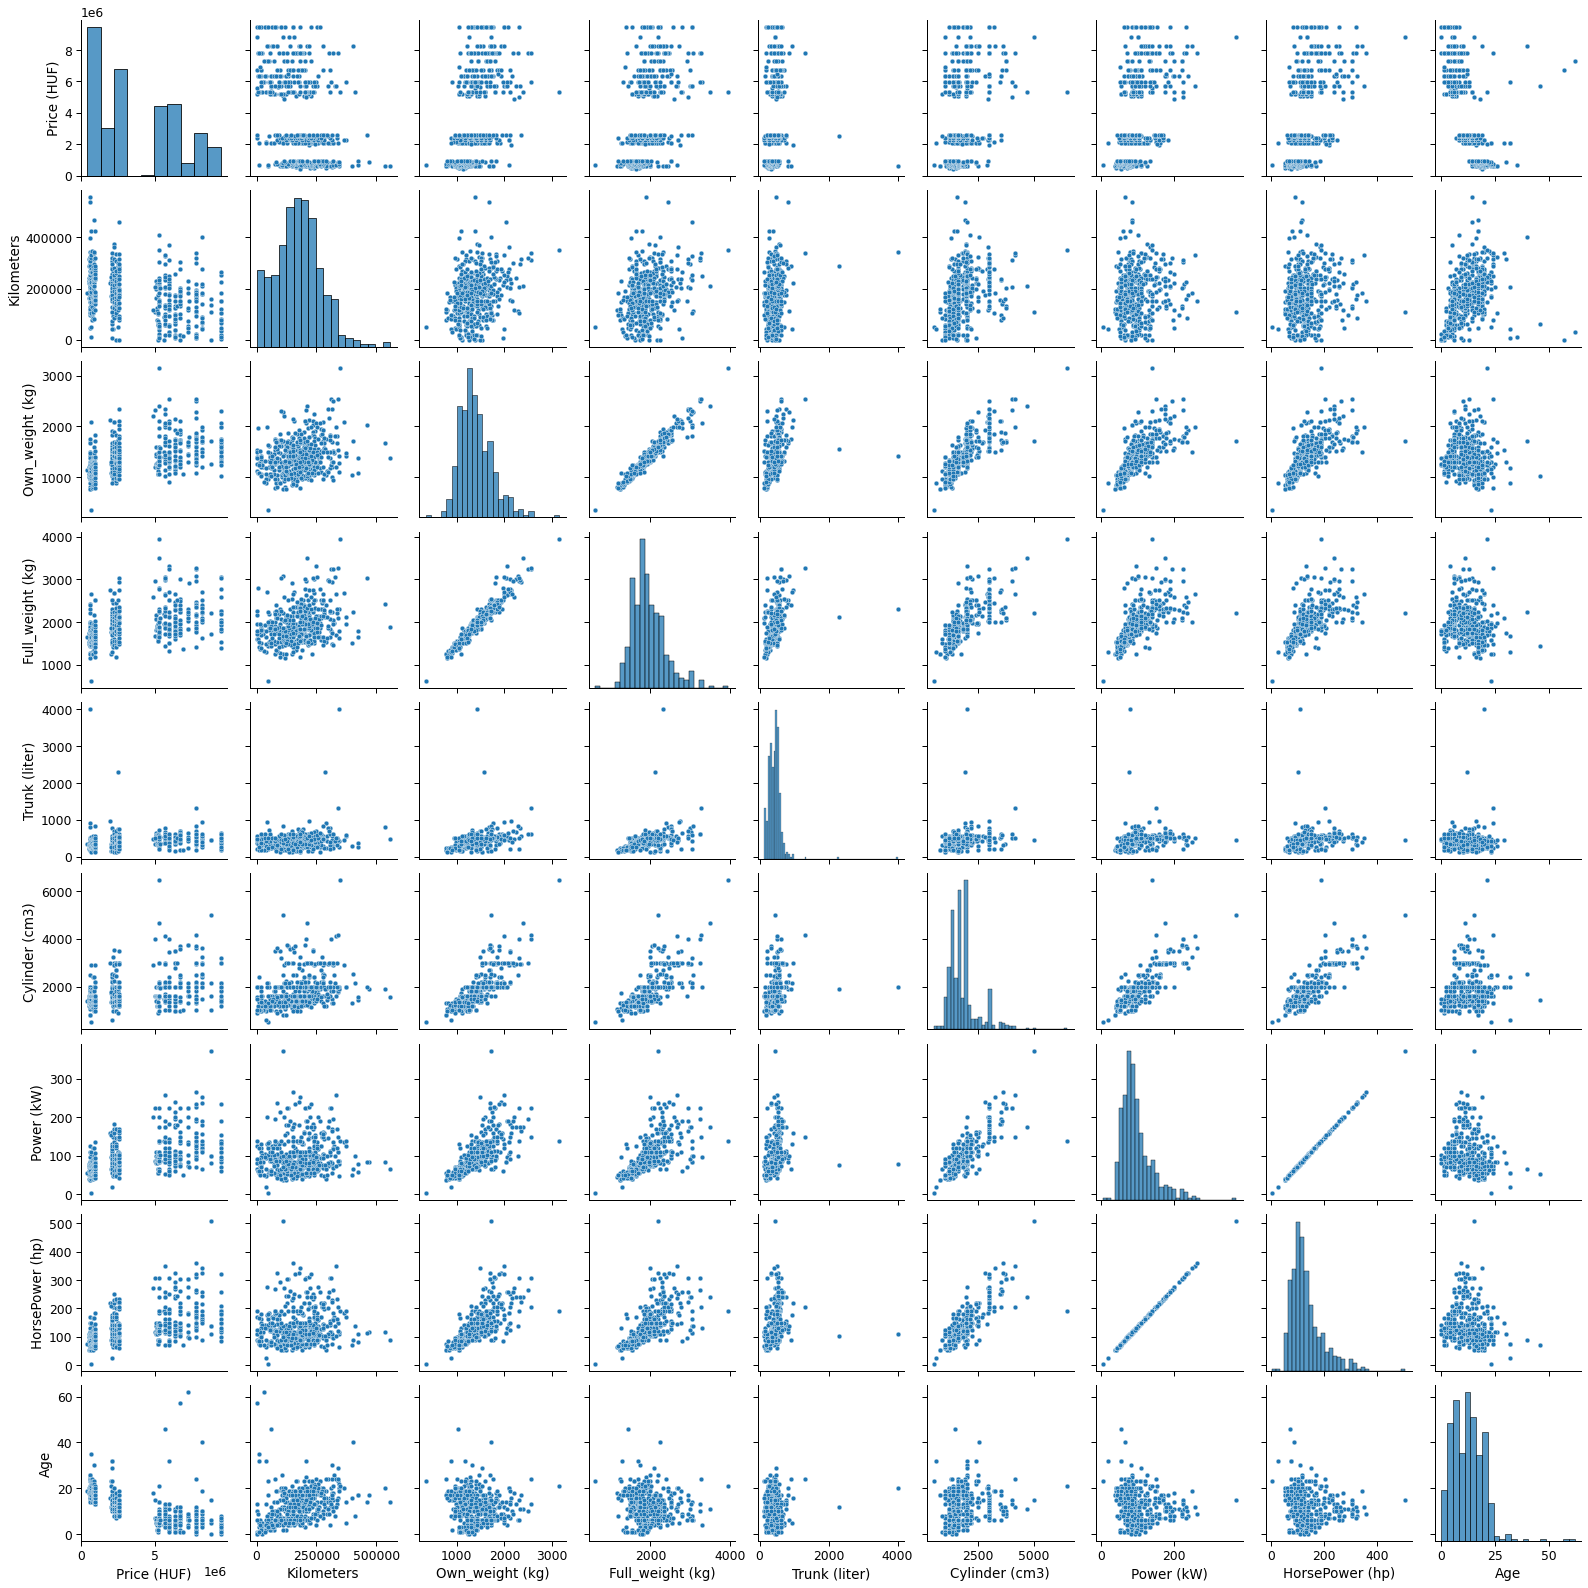

In [27]:
sns.pairplot(cars_df_cleaned)

Most of the variables are rather normally distributed or has a right skewed distribution. (Right skewed data should be tranformed to a normal distribution, if we are going to use linear regression for instance) Next, I performed a boxplot for each numeric variable, to check whether outliers exists or not.

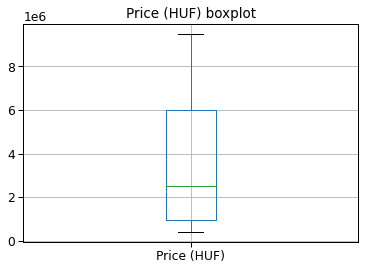

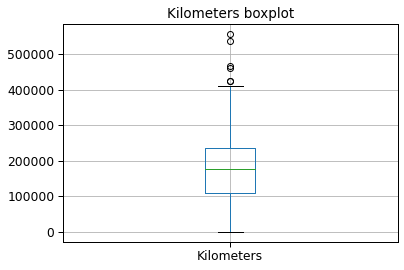

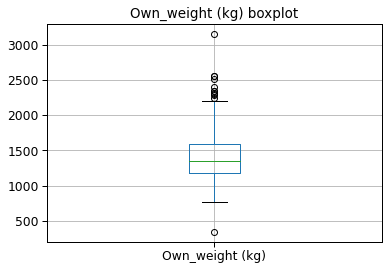

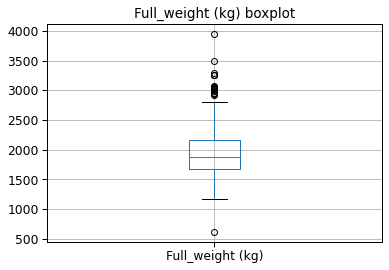

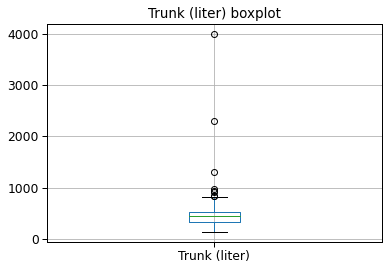

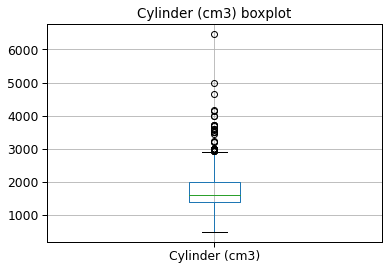

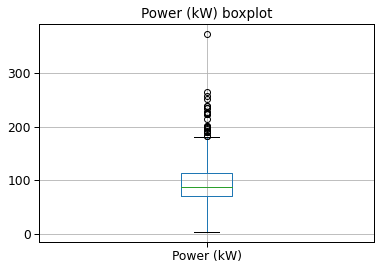

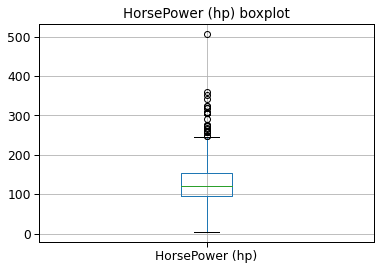

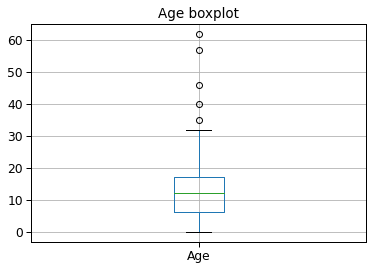

In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = cars_df_cleaned.select_dtypes(include=numerics).columns

for col in numeric_cols:
    cars_df_cleaned.boxplot(column=[col])
    plt.title(col + ' boxplot')
    plt.show()

There are some outliers which should be handled in the modeling phase, for instance Age, Cylinder, Weight etc.

With the violin plots, I checked the relationship between the 2 variables, and also how they are distributed in each category.

Text(0.5, 1.0, 'Violin plot - Condition ~ Price (HUF)')

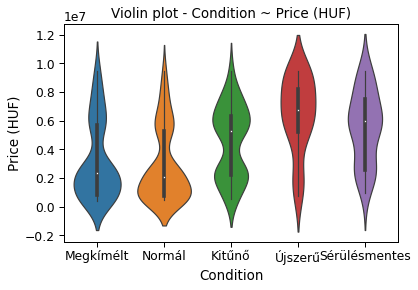

In [29]:
sns.violinplot(x='Condition',y='Price (HUF)',data=cars_df_cleaned, split=True)
plt.title('Violin plot - Condition ~ Price (HUF)')

Text(0.5, 1.0, 'Violin plot - Condition ~ Kilometers')

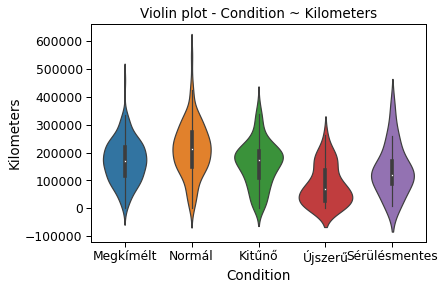

In [30]:
sns.violinplot(x='Condition',y='Kilometers',data=cars_df_cleaned, split=True)
plt.title('Violin plot - Condition ~ Kilometers')

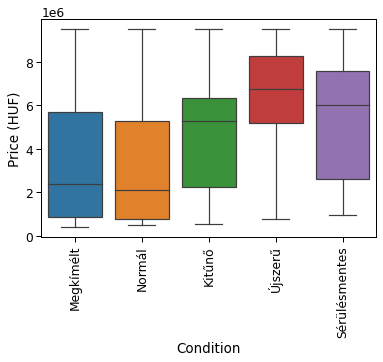

In [36]:
sns.boxplot(x='Condition', y='Price (HUF)', data=cars_df_cleaned)
plt.xticks(rotation=90)
plt.show()

The correlation plot is a must in EDA, to see how the variables are correlated with each other. Multicollinearity should be avoided in the modeling phase.

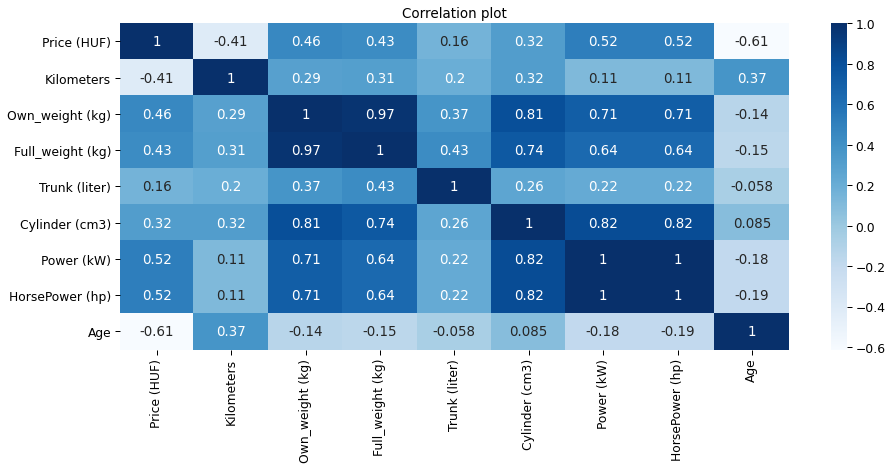

In [38]:
corr_mx = cars_df_cleaned[numeric_cols].corr()
plt.figure(figsize=(15,6))
sns.set_context('paper',font_scale=1.4)
sns.heatmap(corr_mx, annot=True, cmap='Blues')
plt.title('Correlation plot')
plt.show()

Price has a weak correlation with the Trunk variable, it can be excluded from the modeling later.

For each categorical variable I perform a bar chart, to check whether the variable is imbalance or not.

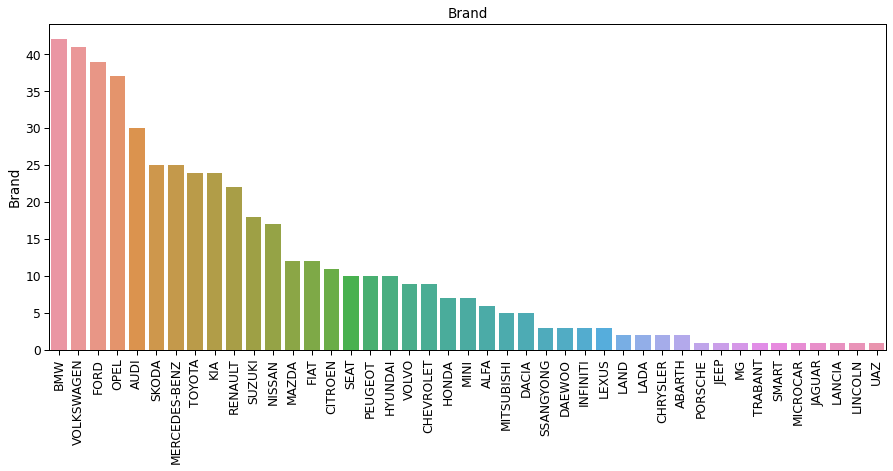

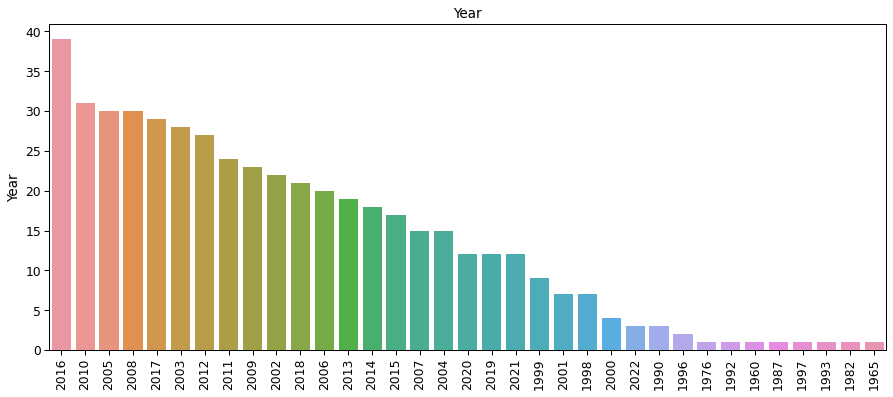

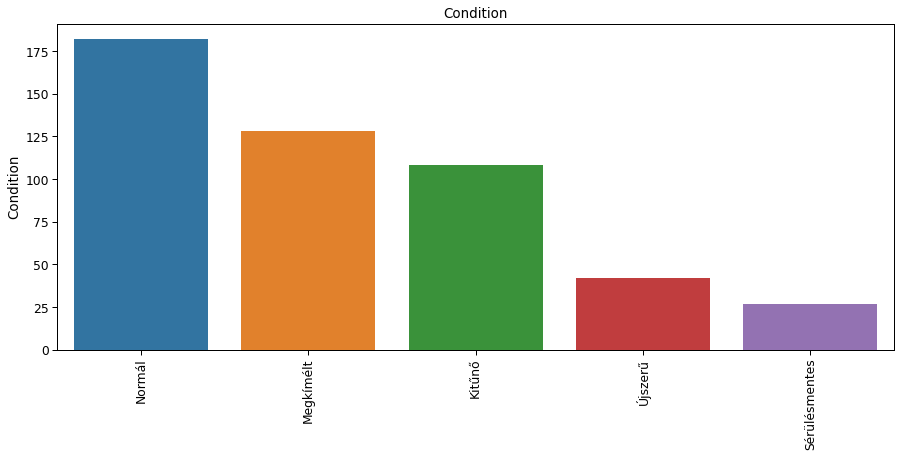

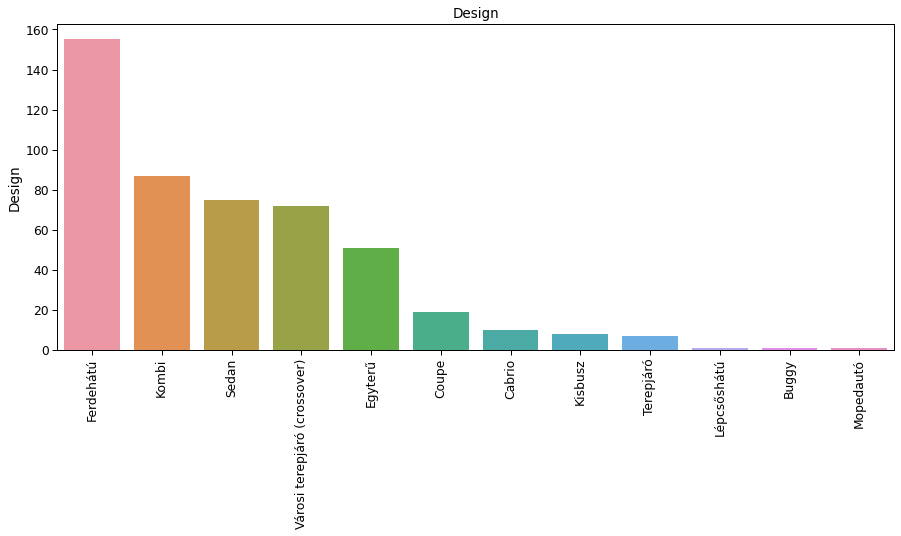

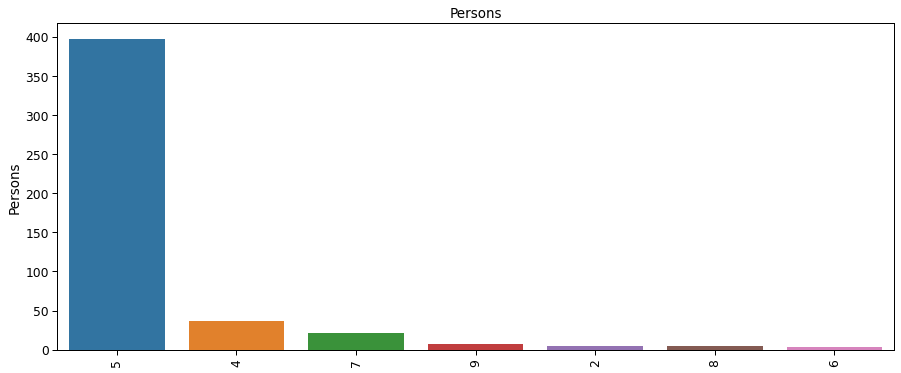

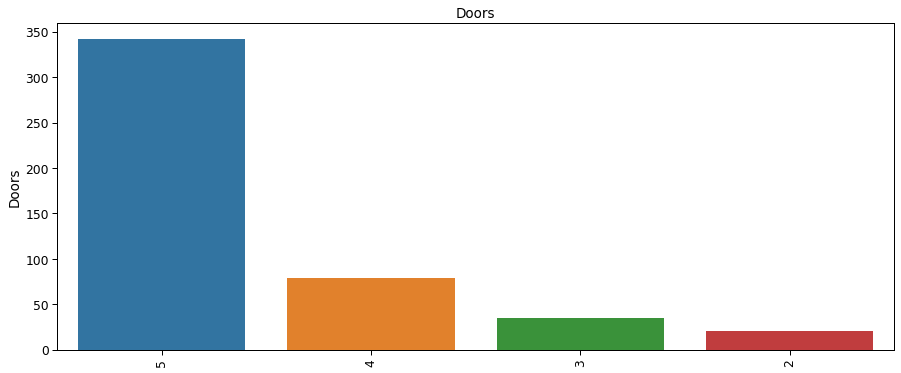

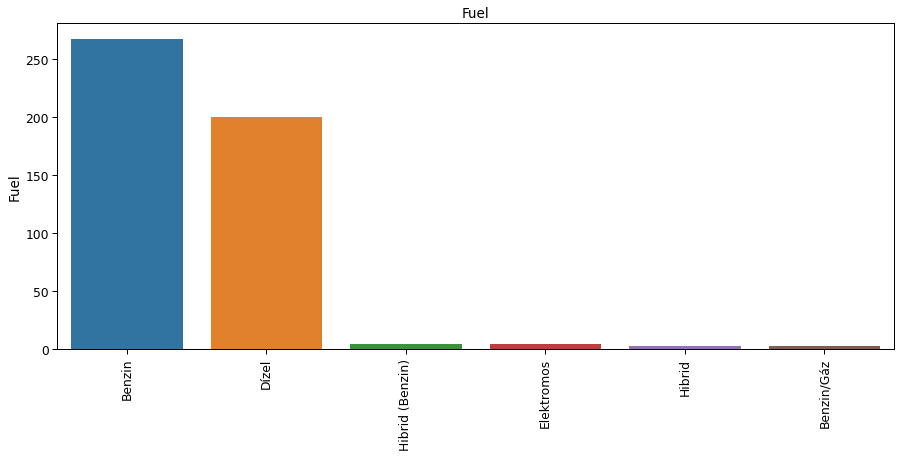

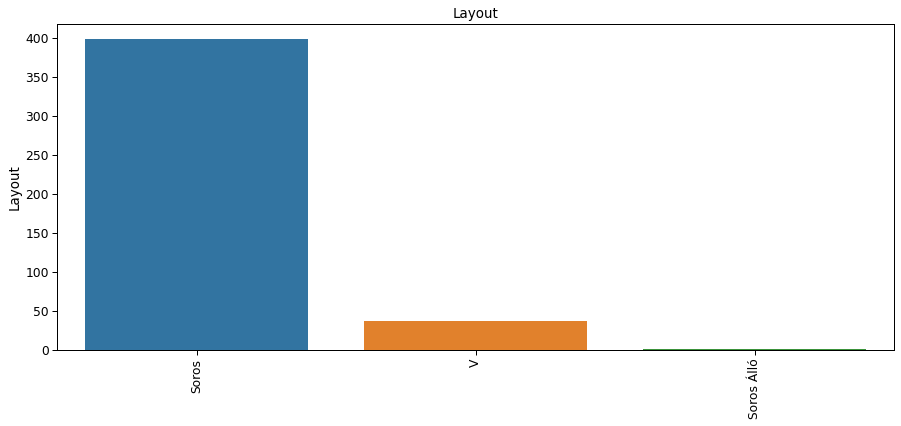

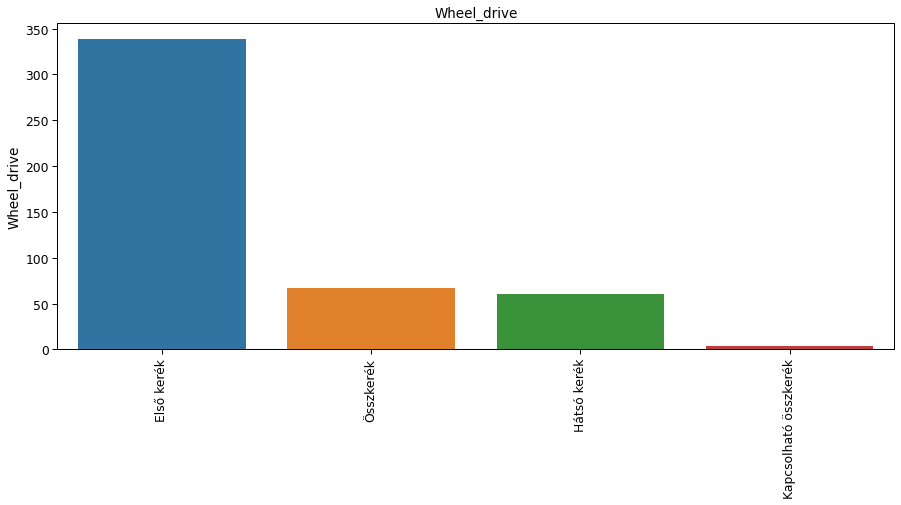

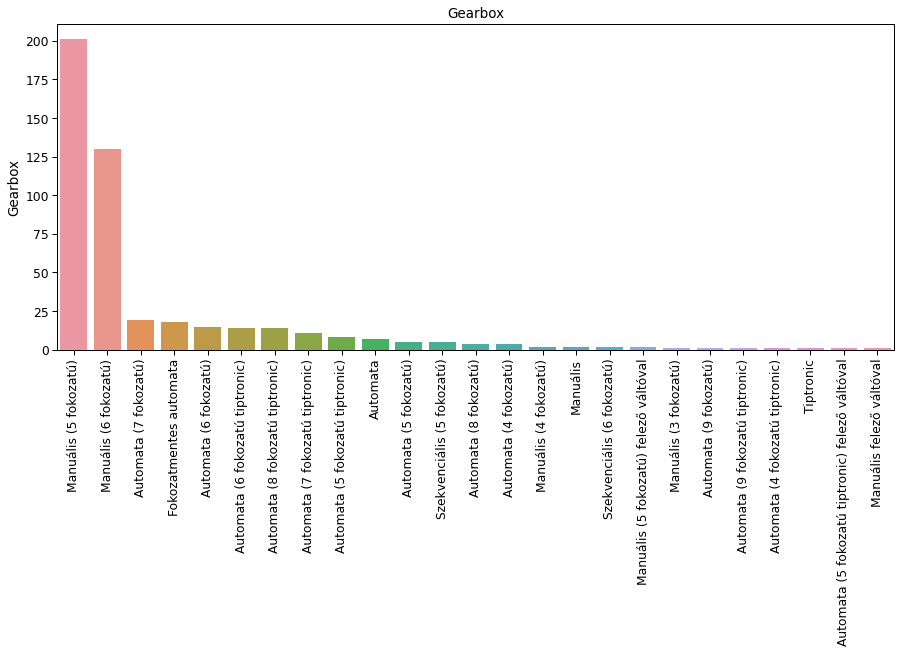

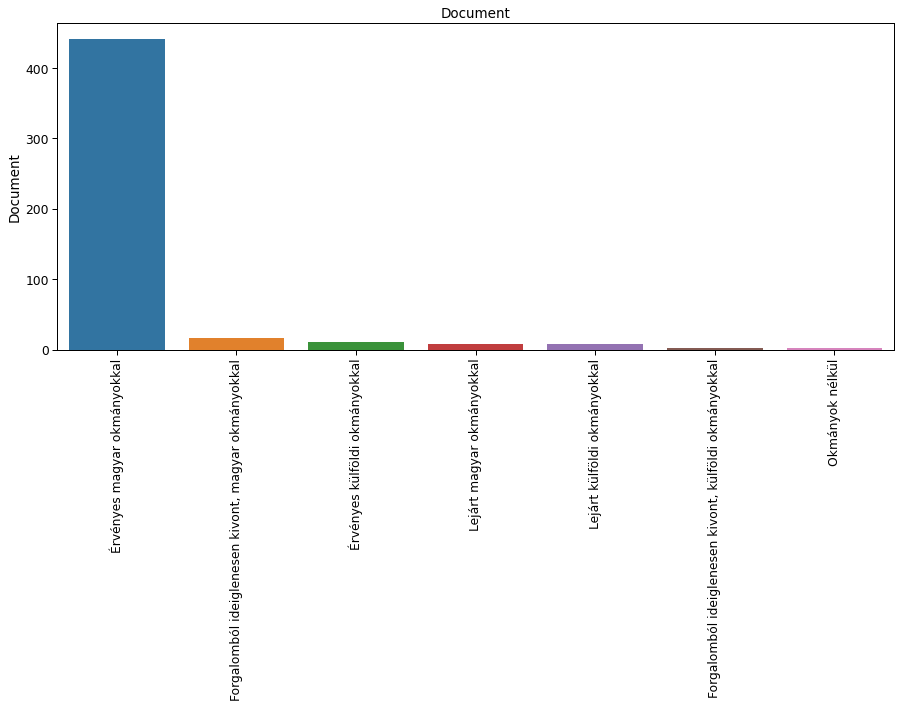

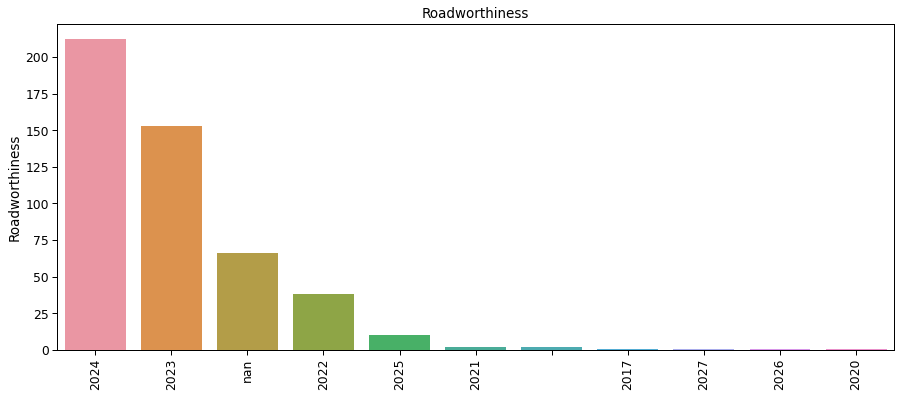

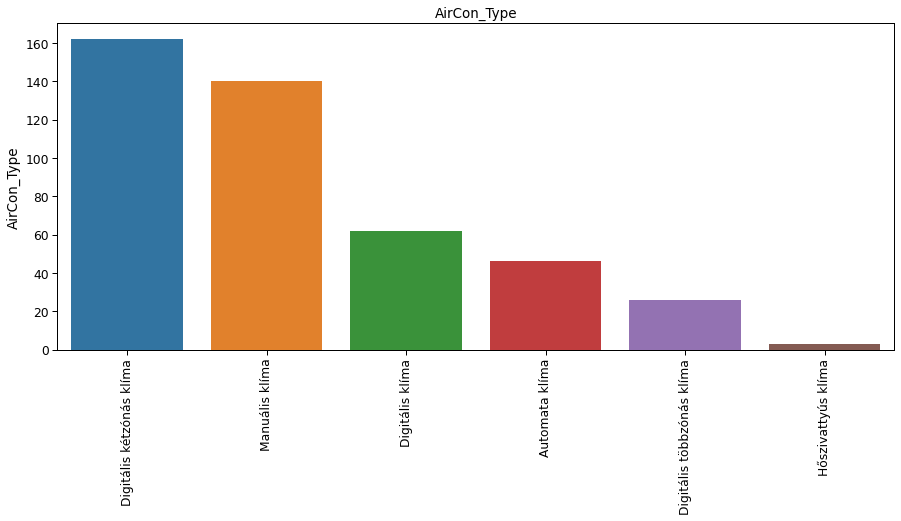

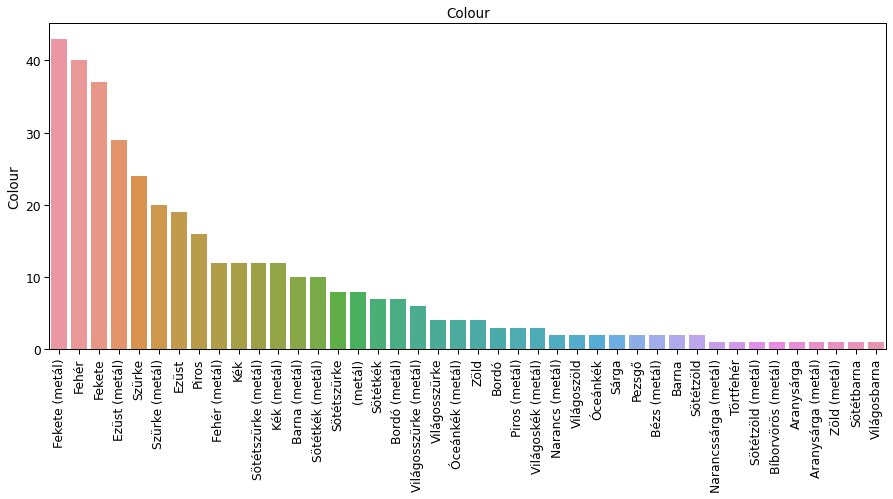

In [39]:
categorical = ['object']
categorical_cols = cars_df_cleaned.select_dtypes(include=categorical).columns

for cols in categorical_cols:
    if cols != 'Full_Name':
        cat_num = cars_df_cleaned[cols].value_counts()
        plt.figure(figsize=(15,6))
        sns.barplot(x=cat_num.index, y=cat_num)
        plt.xticks(rotation=90)
        plt.title(cols)
        plt.show()
    else:
        pass

Finally, I did some pivoting, to see the average of the numerical variables in each category.

In [40]:
pd.pivot_table(cars_df_cleaned, index=['Brand','Condition','Year'], values=numeric_cols.tolist())\
.sort_values('Brand', ascending = False)

Age  Cylinder (cm3)  Full_weight (kg)  \
Brand         Condition     Year                                          
VOLVO         Újszerű       2017    5         2000.00               NaN   
                            2004   18         2922.00       2590.000000   
              Normál        2015    7         2400.00       2505.000000   
                            2008   14         2435.00       1980.000000   
              Megkímélt     2015    7         2184.50       2402.500000   
              Kitűnő        2016    6         1969.00       2130.000000   
                            2015    7         2400.00       2400.000000   
                            2010   12         1560.00       1780.000000   
VOLKSWAGEN    Megkímélt     1999   23         1595.00       1580.000000   
                            2016    6         1582.50       1865.000000   
                            2009   13         1679.00       2160.000000   
                            2008   14         1687.00       2035.000000   
                            2004   18         1198.00       1550.000000   
                            2003   19         1494.00       1710.000000   
                            2002   20         1390.00       1560.000000   
              Kitűnő        2015    7         1968.00       2310.000000   
              Megkímélt     1998   24         1595.00               NaN   
              Kitűnő        2017    5         1681.50       1870.000000   
                            2016    6         1968.00       2250.000000   
              Normál        2003   19         1896.00       1630.000000   
              Kitűnő        2013    9         1968.00       2520.000000   
                            2012   10         1968.00       2260.000000   
              Normál        2000   22         1595.00       1720.000000   
                            1999   23         1896.00       1850.000000   
                            2005   17         2194.50       2297.500000   
                            2018    4         1968.00       2250.000000   
              Újszerű       2018    4             NaN       1960.000000   
                            1965   57             NaN               NaN   
              Sérülésmentes 2021    1             NaN       1530.000000   
                            2017    5         1968.00       2110.000000   
                            2010   12         1598.00       2060.000000   
              Újszerű       2009   13         1595.00       1780.000000   
              Normál        2016    6         1968.00       2250.000000   
                            2014    8             NaN       1500.000000   
                            2013    9         1968.00       1990.000000   
                            2012   10         1598.00       1980.000000   
                            2010   12         1532.80       1858.800000   
                            2015    7         1598.00       2060.000000   
UAZ           Normál        1990   32         2400.00               NaN   
TRABANT       Újszerű       1990   32          594.00       1300.000000   
TOYOTA        Megkímélt     2008   14         1598.00       1750.000000   
                            2016    6         1364.00       1795.000000   
                            2014    8          998.00       1190.000000   
                            2011   11         1329.00       1720.000000   
              Kitűnő        2020    2         1598.00       1790.000000   
              Megkímélt     2007   15         1998.00       1970.000000   
                            2004   18         1995.00       1760.000000   
                            2003   19          998.00       1350.000000   
              Normál        2003   19         1592.50       1790.000000   
                            1998   24         2748.00       2250.000000   
                            2002   20         1299.00       1480.000000   
                            2006   16          998.00      

In [41]:
temp = cars_df_cleaned[['Design','AirCon_Type','Fuel','Wheel_drive','Gearbox']]

for i in temp.columns:
    temp = pd.pivot_table(cars_df_cleaned, index=i, values='Price (HUF)').sort_values('Price (HUF)', ascending = False)
    temp = pd.DataFrame(temp)
    display(temp)

,Price (HUF)
Design,
Buggy,6.750000e+06
Városi terepjáró (crossover),5.913864e+06
Coupe,5.062368e+06
Kisbusz,5.034750e+06
Cabrio,4.778900e+06
Terepjáró,4.202571e+06
Kombi,4.007942e+06
Sedan,3.843844e+06
Egyterű,2.905939e+06


,Price (HUF)
AirCon_Type,
Hőszivattyús klíma,8.163333e+06
Digitális többzónás klíma,7.125269e+06
Digitális kétzónás klíma,5.054334e+06
Automata klíma,3.958260e+06
Digitális klíma,3.894710e+06
Manuális klíma,2.222266e+06


,Price (HUF)
Fuel,
Elektromos,7.994000e+06
Hibrid (Benzin),7.266000e+06
Hibrid,6.846666e+06
Dízel,4.470877e+06
Benzin,3.131693e+06
Benzin/Gáz,2.756333e+06


,Price (HUF)
Wheel_drive,
Összkerék,5.928153e+06
Hátsó kerék,4.821333e+06
Kapcsolható összkerék,4.387500e+06
Első kerék,3.156566e+06


,Price (HUF)
Gearbox,
Automata (8 fokozatú tiptronic),7.826429e+06
Automata (9 fokozatú),7.800000e+06
Tiptronic,7.300000e+06
Manuális,7.266154e+06
Automata (8 fokozatú),6.882500e+06
Automata (7 fokozatú tiptronic),6.870909e+06
Automata (7 fokozatú),6.748368e+06
Fokozatmentes automata,6.638167e+06
Automata (6 fokozatú),6.605400e+06


Parallel plot to compare a subgroup (condition).

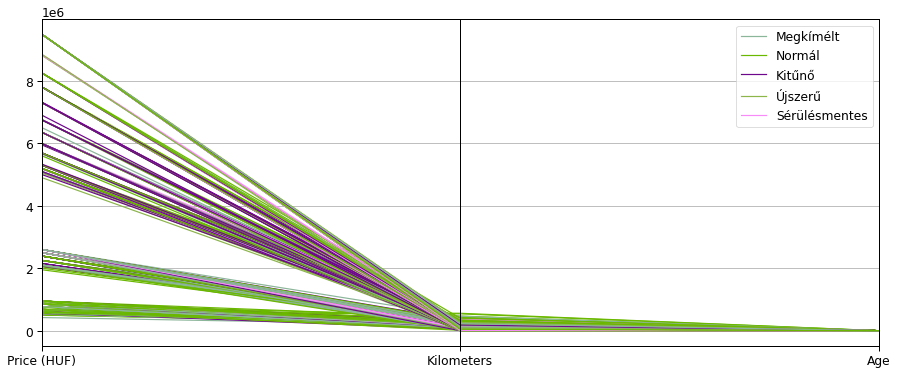

In [42]:
plt.figure(figsize=(15,6))
pd.plotting.parallel_coordinates(cars_df_cleaned[['Condition','Price (HUF)','Kilometers','Age']], 'Condition')

plt.show()

Maybe we can have a better insight if we rescale our data:

In [43]:
sc = StandardScaler()
sc.fit(cars_df_cleaned[['Price (HUF)','Kilometers','Age']])

cars_df_cleaned[['Price (HUF)','Kilometers','Age']] = sc.transform(cars_df_cleaned[['Price (HUF)','Kilometers','Age']])

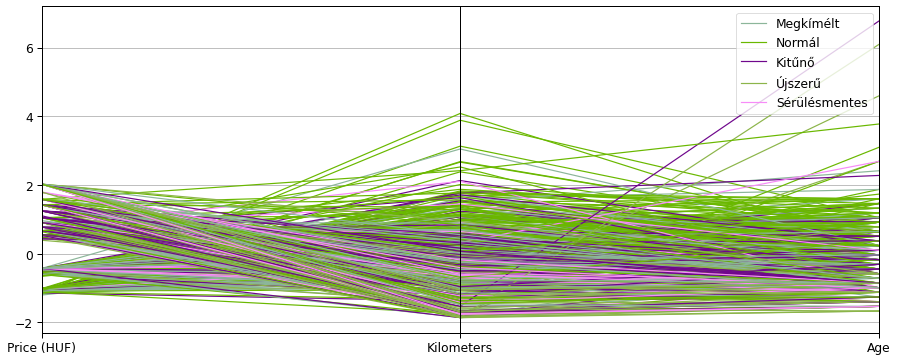

In [44]:
plt.figure(figsize=(15,6))
pd.plotting.parallel_coordinates(cars_df_cleaned[['Condition','Price (HUF)','Kilometers','Age']], 'Condition')

plt.show()